# 📊 Exploratory Data Analysis of Nifty 50 Historical Data
_By Preetika

## 🛠 Step 1: Import libraries


📥 Step 2: Load data

In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/Nifty 50 Historical Data.csv')

# Show the first few rows to check
df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,07/04/2025,"25,461.00","25,428.85","25,470.25","25,331.65",193.51M,0.22%
1,07/03/2025,"25,405.30","25,505.10","25,587.50","25,384.35",293.43M,-0.19%
2,07/02/2025,"25,453.40","25,588.30","25,608.10","25,378.75",309.83M,-0.35%
3,07/01/2025,"25,541.80","25,551.35","25,593.40","25,501.80",260.67M,0.10%
4,06/30/2025,"25,517.05","25,661.65","25,669.35","25,473.30",270.98M,-0.47%


🧹 Step 3: Data cleaning
- Converted columns to numeric
- Converted Date column to datetime
- Sorted data by Date


In [3]:
# Check number of rows and columns
print(df.shape)

# Check data types and non-null counts
df.info()


(248, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      248 non-null    object
 1   Price     248 non-null    object
 2   Open      248 non-null    object
 3   High      248 non-null    object
 4   Low       248 non-null    object
 5   Vol.      248 non-null    object
 6   Change %  248 non-null    object
dtypes: object(7)
memory usage: 13.7+ KB


In [4]:
print(df.isnull().sum())


Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


📊 Step 4: Descriptive statistics
- Overview of data: mean, median, min, max



In [5]:
# Convert numeric columns to proper numbers
cols_to_numeric = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
for col in cols_to_numeric:
    df[col] = df[col].replace({',': '', 'M': 'e6', '%': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check again to confirm changes
df.info()

# Show basic stats
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      248 non-null    object 
 1   Price     248 non-null    float64
 2   Open      248 non-null    float64
 3   High      248 non-null    float64
 4   Low       248 non-null    float64
 5   Vol.      248 non-null    float64
 6   Change %  248 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.7+ KB
              Price          Open          High           Low          Vol.  \
count    248.000000    248.000000    248.000000    248.000000  2.480000e+02   
mean   24209.683468  24216.030847  24331.751210  24086.303024  3.166391e+08   
std      896.467258    900.541862    890.882244    903.990947  9.804912e+07   
min    22082.650000  21758.400000  22105.050000  21743.650000  3.881000e+07   
25%    23531.150000  23543.387500  23689.762500  23430.912500  2.572000e+08   
50%    24340.00000

📈 Step 5: Visual exploration
- Line plot: Nifty 50 price over time
- Histogram: daily change %
- Correlation heatmap


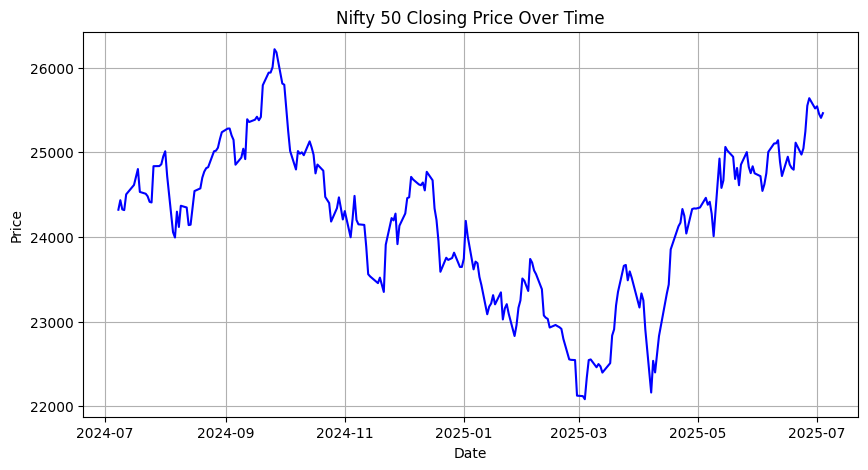

In [6]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date (oldest first)
df = df.sort_values('Date')

# Plot
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Price'], color='blue')
plt.title('Nifty 50 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


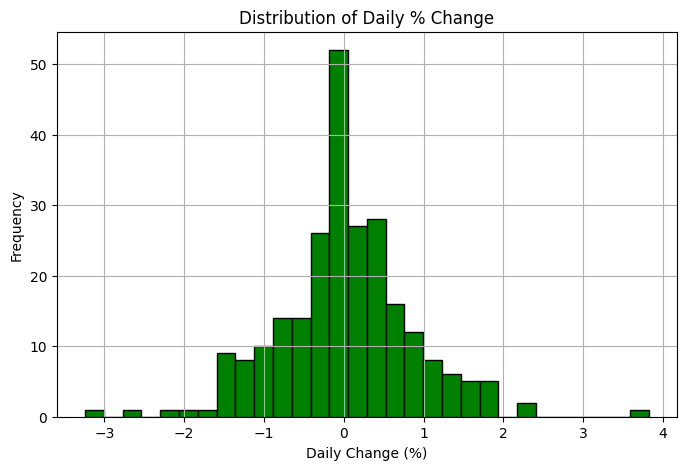

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df['Change %'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Daily % Change')
plt.xlabel('Daily Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


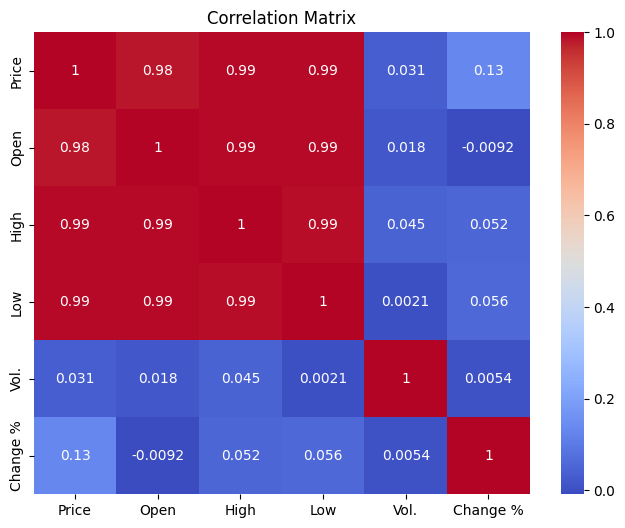

In [8]:
import seaborn as sns

# Select numeric columns
numeric_cols = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


 ✅ Step 6: Conclusion & Insights
- Average daily price change is around +2.2%.
- Highest daily volume traded was ~853 million.
- Open, High, Low, Close prices show strong positive correlation (~0.98–0.99)
- Helped me practice Python, Pandas, Matplotlib, Seaborn & data storytelling
